<a href="https://colab.research.google.com/github/Sank3t-Pand3y/Tensor-PyTorch/blob/main/ann_fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [7]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [8]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device : {device}")

Using device : cuda


In [9]:
df = pd.read_csv("fmnist_small.csv")

In [10]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


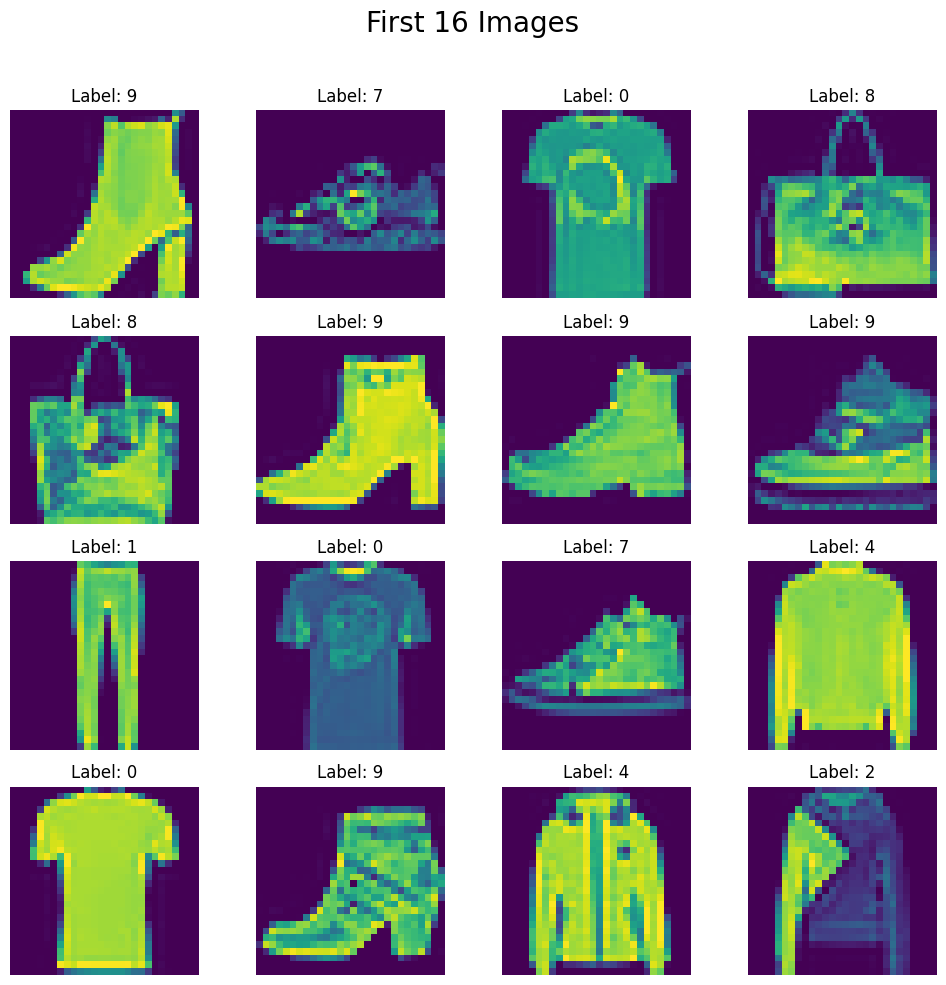

In [11]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("First 16 Images", fontsize=20)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28,28)  # Reshape to 28x28
  ax.imshow(img) # Display in grayscale
  ax.axis('off') # Remove axis for a cleaner look
  ax.set_title(f"Label: {df.iloc[i, 0]}") # Show the label

plt.tight_layout(rect = [0,0,1,0.96]) # Adjust layout to fit the title
plt.show()

In [12]:
# Train Test Split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
# Scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [15]:
# create CustomDataset Class

class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [16]:
# Create train_dataset Object
train_dataset = CustomDataset(X_train, y_train)

In [17]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [18]:
# create test_dataset object

test_dataset = CustomDataset(X_test, y_test)

In [33]:
# create train and test loader. i.e aba dataset object ko HELP ligera dataloader object banauney

train_loader = DataLoader(train_dataset, batch_size =32, shuffle = True, pin_memory = True)
test_loader = DataLoader(test_dataset, batch_size= 32, shuffle=False, pin_memory = True)

In [20]:
# Define the NN class
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
        # No Need to softMax acivation function
    )

  # forward pass
  def forward(self, x):
    return self.model(x)

### Training Pipeline Process

In [21]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [29]:
# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device) # we are converting our model into GPU
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [23]:
len(train_loader)

150

In [24]:
# we have 150 batches and each batch has 32 rows (i.e sample)

In [30]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.3706780024369558
Epoch: 2 , Loss: 0.8149621870120366
Epoch: 3 , Loss: 0.6875078386068344
Epoch: 4 , Loss: 0.6045146359999974
Epoch: 5 , Loss: 0.5539473232626915
Epoch: 6 , Loss: 0.518776685098807
Epoch: 7 , Loss: 0.4793628549575806
Epoch: 8 , Loss: 0.4552877178788185
Epoch: 9 , Loss: 0.42496490200360615
Epoch: 10 , Loss: 0.4132678733269374
Epoch: 11 , Loss: 0.4003375905752182
Epoch: 12 , Loss: 0.3745720329384009
Epoch: 13 , Loss: 0.36216840441028275
Epoch: 14 , Loss: 0.3475112537046274
Epoch: 15 , Loss: 0.32037067915002504
Epoch: 16 , Loss: 0.3235921909411748
Epoch: 17 , Loss: 0.3021809384226799
Epoch: 18 , Loss: 0.2900538507600625
Epoch: 19 , Loss: 0.2774210822830598
Epoch: 20 , Loss: 0.2659265294671059
Epoch: 21 , Loss: 0.25516432943443457
Epoch: 22 , Loss: 0.24827772880593935
Epoch: 23 , Loss: 0.2416267264386018
Epoch: 24 , Loss: 0.23589592511455218
Epoch: 25 , Loss: 0.22410210107142728
Epoch: 26 , Loss: 0.20813029281795026
Epoch: 27 , Loss: 0.20773025364925465
Ep

### Evaluation

In [26]:
# set model to evaluate the model

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [31]:
# evaluation code (i.e. we are calculating the Accuracy)
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

      # move data to GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)


    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)



0.84


In [32]:
len(test_loader)

38